In [1]:
#  Import Basic Libraries

import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the images
image1_path = "/home/planck/Ravi_Saxena/Python_Codes/CV/Ass_CV/Data_1/DATA_2/000000.png"
image2_path = "/home/planck/Ravi_Saxena/Python_Codes/CV/Ass_CV/Data_1/DATA_2/000023.png"
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

# Load the Fundamental matrix F
F=np.array([[3.34638533e-07,7.58547151e-06,-2.04147752e-03],[-5.83765868e-06,1.36498636e-06,2.67566877e-04],[1.45892349e-03,4.37648316e-03,1.00000000e+00]])
F=torch.from_numpy(F).float()

# Convert images to tensors
image1_tensor = torch.from_numpy(np.array(image1)).float()
image2_tensor = torch.from_numpy(np.array(image2)).float()

# Function to compute epipolar lines
def compute_epipolar_lines(image, F, point):
    # Convert point to homogeneous coordinates
    point_homo = torch.tensor([point[0], point[1], 1.0], dtype=torch.float32)
    # Compute epipolar line
    epipolar_line = torch.matmul(F, point_homo)
    # Normalize line
    epipolar_line /= torch.norm(epipolar_line[:2])
    return epipolar_line





In [2]:
# Function to plot epipolar lines

def plot_epipolar_lines(image, epipolar_lines):
    plt.imshow(image)
    for line in epipolar_lines:
        a, b, c = line[0], line[1], line[2]
        x = np.arange(image.shape[1])
        y = (-a * x - c) / b
        plt.plot(x, y, color='g')
    plt.show()


# Function to find corresponding pixels on epipolar lines
def find_corresponding_pixels(image, epipolar_lines, spacing):
    corresponding_pixels = []
    for line in epipolar_lines:
        a, b, c = line[0], line[1], line[2]
        x = np.arange(0, image.shape[1], spacing)
        y = (-a * x - c) / b
        y = np.clip(y, 0, image.shape[0]-1).astype(int)
        corresponding_pixels.append(list(zip(x, y)))
    return corresponding_pixels

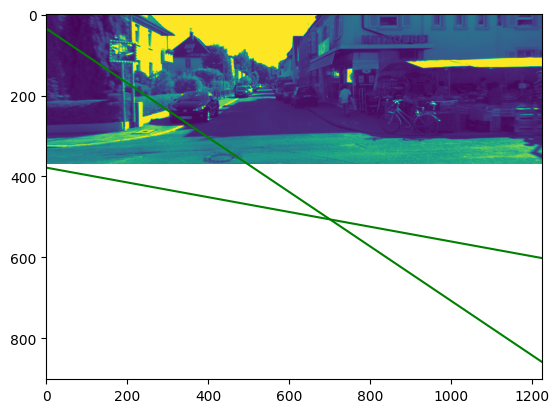

Corresponding pixels on epipolar lines in image1: [[(0, 369), (100, 369), (200, 369), (300, 369), (400, 369), (500, 369), (600, 369), (700, 369), (800, 369), (900, 369), (1000, 369), (1100, 369), (1200, 369)]]
Corresponding pixels on epipolar lines in image2: [[(0, 34), (100, 101), (200, 168), (300, 236), (400, 303), (500, 369), (600, 369), (700, 369), (800, 369), (900, 369), (1000, 369), (1100, 369), (1200, 369)]]


In [20]:
# Two points
point1 = [8000, 1000]  # Example point on image1
point2 = [1000, 2000]  # Example point on image2

# Compute epipolar lines
epipolar_line1 = compute_epipolar_lines(image1_tensor, F, point1)
epipolar_line2 = compute_epipolar_lines(image2_tensor, F.T, point2)

# Plot epipolar lines
plot_epipolar_lines(np.array(image1), [epipolar_line1.numpy(), epipolar_line2.numpy()])

# Find corresponding pixels on epipolar lines
corresponding_pixels1 = find_corresponding_pixels(np.array(image1), [epipolar_line1.numpy()], spacing=100)
corresponding_pixels2 = find_corresponding_pixels(np.array(image2), [epipolar_line2.numpy()], spacing=100)

print("Corresponding pixels on epipolar lines in image1:", corresponding_pixels1)
print("Corresponding pixels on epipolar lines in image2:", corresponding_pixels2)
